In [1]:
import os
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

import mplfinance as mpf
import finplot as fplt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

C:\Users\binis\AppData\Local\Temp\ipykernel_15928\1177459007.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
repo_path = Path('.')
stocks_data_path = repo_path.absolute() / 'stock_dfs'
stocks_data_path

WindowsPath('H:/My Drive/Slate/Notes_G/Finance Job/python for finance/stock_dfs')

# P7 - Combining all S&P 500 company prices into one DataFrame

In [34]:
ticker_list = stocks_data_path.glob("*.csv")
df_list = []
for ticker in ticker_list:
    df = pd.read_csv(ticker)
    ticker_name = ticker.stem
    df.reset_index(inplace=True)
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker_name}, inplace=True)
    df.drop(['index', 'Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
    df_list.append(df)
    
df_merged = pd.concat(df_list, axis=1)
del df, df_list

In [35]:
df_merged.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,120.669167,44.173920,80.490295,73.511124,196.918198,334.429993,49.099998,17.618324,47.937786,83.502022,...,18.037569,192.425278,325.146423,140.961746,55.022354,75.849640,94.470108,259.140015,140.247574,130.193314
2020-01-03,119.630074,43.785530,79.509041,72.813339,196.590271,331.809998,48.599998,17.416014,47.605324,82.161339,...,18.114355,192.472397,321.326355,138.870865,55.286957,76.296104,94.174225,256.049988,139.880997,130.212738
2020-01-06,119.744041,44.062950,79.925591,73.387978,195.306519,333.709991,48.389999,17.618324,47.470547,82.404228,...,18.352398,192.707870,318.336212,138.595993,55.207577,75.802162,94.118744,258.010010,139.072586,129.213013
2020-01-07,119.261375,43.767048,79.481262,72.969322,191.089844,333.390015,48.250000,17.679895,47.021259,82.656815,...,18.352398,192.312225,318.666290,139.253693,55.092915,75.517166,94.285187,256.470001,138.950394,129.649796
2020-01-08,121.091507,43.702312,79.805267,73.486481,191.464676,337.869995,47.830002,17.644711,47.165043,83.472893,...,18.068285,192.528900,322.033661,140.127350,55.039997,75.773651,94.451645,247.639999,140.614182,129.368301


In [36]:
df_merged.to_csv('sp500_joined_closes.csv')


# P8 : Creating massive S&P 500 company correlation table for Relationships 

In [44]:
# df_merged.set_index('Date', inplace=True)
# df_merged.head()

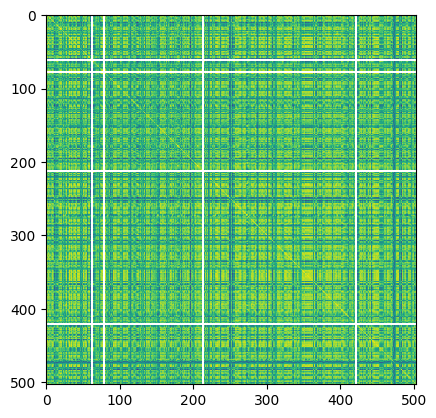

In [43]:
df_corr = df_merged.corr()

plt.imshow( df_corr)
plt.show()

# P9 - Preprocessing data to prepare for Machine Learning with stock data

* Our features can be other company's prices, but we're going to instead say the features are the pricing changes that day for all companies. 
* Our label will be whether or not we actually want to buy a specific company.
* Let's say we're considering Exxon (XOM). What we'll do for featuresets is take into account all company percent changes that day, and those will be our features.
* Our label will be whether or not Exxon (XOM) rose more than x% within the next x days, where we can pick whatever we want for x.
* To start, let's say a company is a buy if, within the next 7 days, its price goes up more than 2% and it is a sell if the price goes down more than 2% within those 7 days.

In [49]:
ticker = 'AAPL'
def process_data_for_label(df, ticker):
    hm_days = 7
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1,hm_days+1):
        df[f'{ticker}_{i}'] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace=True)
    
    return df

df_merged = process_data_for_label(df_merged, ticker)

In [50]:
df_merged.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,ZBRA,ZBH,ZTS,AAPL_1,AAPL_2,AAPL_3,AAPL_4,AAPL_5,AAPL_6,AAPL_7
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,120.669167,44.173920,80.490295,73.511124,196.918198,334.429993,49.099998,17.618324,47.937786,83.502022,...,259.140015,140.247574,130.193314,-0.009722,-0.001831,-0.006526,0.009456,0.030898,0.033228,0.055302
2020-01-03,119.630074,43.785530,79.509041,72.813339,196.590271,331.809998,48.599998,17.416014,47.605324,82.161339,...,256.049988,139.880997,130.212738,0.007968,0.003228,0.019366,0.041018,0.043371,0.065662,0.051272
2020-01-06,119.744041,44.062950,79.925591,73.387978,195.306519,333.709991,48.389999,17.618324,47.470547,82.404228,...,258.010010,139.072586,129.213013,-0.004703,0.011308,0.032788,0.035123,0.057238,0.042962,0.038492
2020-01-07,119.261375,43.767048,79.481262,72.969322,191.089844,333.390015,48.250000,17.679895,47.021259,82.656815,...,256.470001,138.950394,129.649796,0.016087,0.037669,0.040015,0.062234,0.047890,0.043400,0.056470
2020-01-08,121.091507,43.702312,79.805267,73.486481,191.464676,337.869995,47.830002,17.644711,47.165043,83.472893,...,247.639999,140.614182,129.368301,0.021241,0.023549,0.045417,0.031300,0.026881,0.039744,0.051255


# P10 - Creating targets for machine learning labels

In [ ]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

# P11

In [ ]:
from collections import Counter